## Learning about the logistic regression classifier model

Some experiments with logistic regression on some smaller data sets.

In [1]:
# imports and setup
import numpy as np
from numpy.random import default_rng

from sklearn.datasets import make_classification, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.set_printoptions(suppress=True, precision=3)

### Plotting functions

Each of these will generate some plotted 2-dimensional, 2-class data. 

In [2]:
def plot_data(x, y):
    plot_x_min, plot_x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    plot_y_min, plot_y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    # plot the basic data points
    class0_x = x[y==0]
    class1_x = x[y==1]
    plt.scatter(class0_x[:,0], class0_x[:,1], c='r', marker='x', label='Class 0')
    plt.scatter(class1_x[:,0], class1_x[:,1], c='b', marker='o', label='Class 1')
    
    plt.xlim(plot_x_min, plot_x_max)
    plt.ylim(plot_y_min, plot_y_max)
    plt.legend()
    plt.title("Basic data")

In [3]:
def plot_model_prediction(model, x, y):
    plot_x_min, plot_x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    plot_y_min, plot_y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    # plot the separator
    model_intercept = model.intercept_[0]
    weight1, weight2 = model.coef_.T
    line_intercept = -model_intercept/weight2
    line_slope = -weight1/weight2
    line_x = np.array([plot_x_min, plot_x_max])
    line_y = line_slope * line_x + line_intercept
    plt.plot(line_x, line_y, 'm', lw=1, ls='--')
    
    # plot the decision data (two colors)
    xx, yy = np.meshgrid(np.arange(plot_x_min, plot_x_max, 0.01),
                         np.arange(plot_y_min, plot_y_max, 0.01))
    vx, vy = xx.flatten(), yy.flatten()
    vx, vy = vx.reshape((len(vx), 1)), vy.reshape((len(vy), 1))
    grid = np.hstack((vx, vy))
    
    positive_predictions = model.predict(grid)
    zz = positive_predictions.reshape(xx.shape)
    contour = plt.contourf(xx, yy, zz, 
                           cmap=matplotlib.colors.ListedColormap(('r','b')), alpha=0.25)

    # plot the basic data points
    class0_x = x[y==0]
    class1_x = x[y==1]
    plt.scatter(class0_x[:,0], class0_x[:,1], c='r', marker='x', label='Class 0')
    plt.scatter(class1_x[:,0], class1_x[:,1], c='b', marker='o', label='Class 1')
        
    plt.xlim(plot_x_min, plot_x_max)
    plt.ylim(plot_y_min, plot_y_max)
    plt.legend()
    plt.title("Classification regions")

In [4]:
def plot_model_contour(model, x, y):
    plot_x_min, plot_x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    plot_y_min, plot_y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    # plot the separator
    model_intercept = model.intercept_[0]
    weight1, weight2 = model.coef_.T
    line_intercept = -model_intercept/weight2
    line_slope = -weight1/weight2
    line_x = np.array([plot_x_min, plot_x_max])
    line_y = line_slope * line_x + line_intercept
    plt.plot(line_x, line_y, 'm', lw=1, ls='--')
    
    # plot the probability contour (control smoothness with 'levels' parameter)
    xx, yy = np.meshgrid(np.arange(plot_x_min, plot_x_max, 0.1),
                         np.arange(plot_y_min, plot_y_max, 0.1))
    vx, vy = xx.flatten(), yy.flatten()
    vx, vy = vx.reshape((len(vx), 1)), vy.reshape((len(vy), 1))
    grid = np.hstack((vx, vy))
    
    positive_predictions = model.predict_proba(grid)[:, 1]
    zz = positive_predictions.reshape(xx.shape)
    contour = plt.contourf(xx, yy, zz, cmap='Greys', levels=10)
    plt.colorbar(contour)

    # plot the basic data points
    class0_x = x[y==0]
    class1_x = x[y==1]
    plt.scatter(class0_x[:,0], class0_x[:,1], c='r', marker='x', label='Class 0')
    plt.scatter(class1_x[:,0], class1_x[:,1], c='b', marker='o', label='Class 1')
    
    plt.xlim(plot_x_min, plot_x_max)
    plt.ylim(plot_y_min, plot_y_max)
    plt.legend()
    plt.title("Probability(x in class 1)")

## Basic logistic regression on 2-class synthetic data

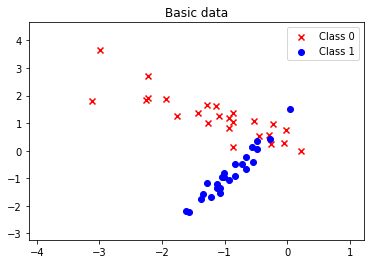

In [5]:
x_N, y_N = make_classification(n_samples=50, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=1)
plot_data(x_N, y_N)

In [6]:
model = LogisticRegression()
model.fit(x_N, y_N)

LogisticRegression()

In [7]:
rng = default_rng()
sample_data = rng.choice(x_N, 5)
sample_data

array([[-1.084,  1.244],
       [-1.609, -2.173],
       [-0.926,  0.816],
       [-0.651, -0.244],
       [-1.264,  1.02 ]])

In [8]:
model.predict(sample_data)

array([0, 1, 0, 1, 0])

In [9]:
model.predict_proba(sample_data)

array([[0.896, 0.104],
       [0.008, 0.992],
       [0.778, 0.222],
       [0.276, 0.724],
       [0.846, 0.154]])

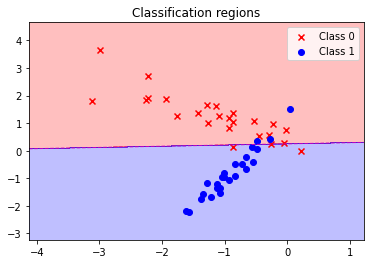

In [10]:
# 1s and 0s
plot_model_prediction(model, x_N, y_N)

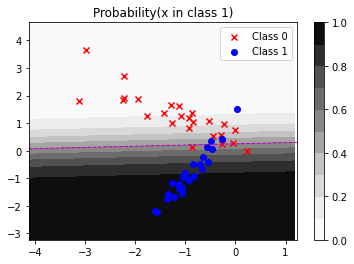

In [11]:
# probablities -- can help you decide where to draw the threshold
# could even feed more uncertain data into another classifer (2nd might be slower or use different method)
plot_model_contour(model, x_N, y_N)

In [12]:
y_pred = model.predict(x_N)
y_prob = model.predict_proba(x_N)

model.score(x_N, y_N)

0.88

In [13]:
# aim to minimize, but really its just a comparison between classifiers (lower = better, actual value isnt super useful)
log_loss(y_N, y_prob)

0.2661455056458897

In [14]:
# DONT DO THIS -- don't run it on the prediction values, because it's gonna compare 1s and 0s to 1s and 0s,
# so if something is misclassified, it gets way worse (exagerates mistakes, tho also somewhat exagerate correct
# predictions but that gets overshadowed)
log_loss(y_N, y_pred)

4.144701143235094

#### ROC curve metrics

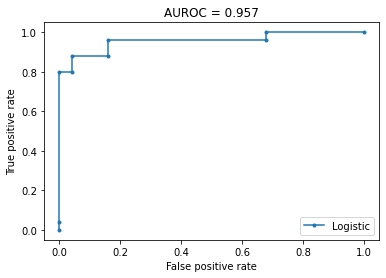

In [15]:
# this would be more interesting on a bigger datasets
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_N, probs_class1)
fpr, tpr, thresholds = roc_curve(y_N, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();

In [16]:
# threshold starts out greater than 1 bc you need a spot where TP and FP rates are zeroed
    # its meaningless -- top value + 1
for i in range(len(fpr)):
    print("Threshold: %f, TPR: %f, FPR: %f" % 
          (thresholds[i], tpr[i], fpr[i]))

Threshold: 1.993215, TPR: 0.000000, FPR: 0.000000
Threshold: 0.993215, TPR: 0.040000, FPR: 0.000000
Threshold: 0.723628, TPR: 0.800000, FPR: 0.000000
Threshold: 0.628903, TPR: 0.800000, FPR: 0.040000
Threshold: 0.555230, TPR: 0.880000, FPR: 0.040000
Threshold: 0.482093, TPR: 0.880000, FPR: 0.160000
Threshold: 0.409847, TPR: 0.960000, FPR: 0.160000
Threshold: 0.082832, TPR: 0.960000, FPR: 0.680000
Threshold: 0.070845, TPR: 1.000000, FPR: 0.680000
Threshold: 0.000671, TPR: 1.000000, FPR: 1.000000


### A built-in test data-set of digit images

In [17]:
digits = load_digits()
print("Data shape: ", digits.data.shape)

Data shape:  (1797, 64)


In [18]:
indices = default_rng().choice(digits.data.shape[0], 5)
random_data = digits.data[indices]
random_data_labels = digits.target[indices]

# Here's a single random data point, as stored in input/label form
print("Data input: ", random_data[0])
print("Data label: ", random_data_labels[0])

Data input:  [ 0.  0.  0.  6. 13.  8.  0.  0.  0.  0.  7. 16.  8.  4.  0.  0.  0.  3.
 15.  2.  0.  0.  0.  0.  0.  6. 12.  4.  0.  0.  0.  0.  0.  4. 16. 13.
 13.  3.  0.  0.  0.  2. 15.  2.  5. 14.  0.  0.  0.  0.  9. 10.  2. 15.
  0.  0.  0.  0.  0.  8. 15. 12.  0.  0.]
Data label:  6


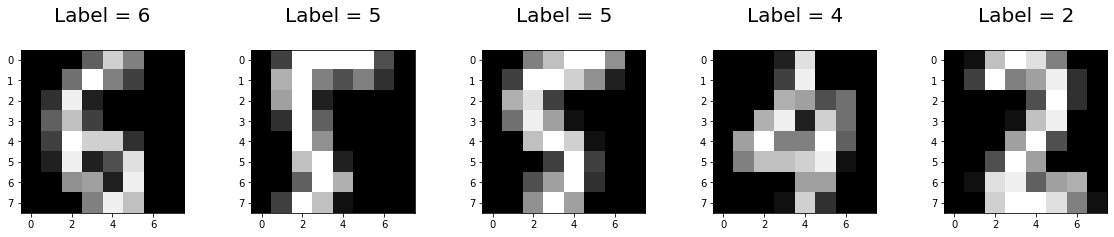

In [19]:
# Here are 5 such random data points, reshaped and displayed as images
plt.figure(figsize=(20, 3))
for index, (img, out) in enumerate(zip(random_data, 
                                       random_data_labels)):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(img, (8,8)), cmap=plt.cm.gray)
    plt.title('Label = %i\n' % out, fontsize=20)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2)
model = LogisticRegression(max_iter=2_500)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
score = model.score(x_test, y_test)
print("Basic accuracy: ", score)

Basic accuracy:  0.9638888888888889


In [21]:
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[29  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  1 36  0  0  0  0  0  0]
 [ 0  1  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  3  2  0  0  2  0  0 35  0]
 [ 0  0  0  0  0  1  0  0  2 29]]


Text(0.5, 1.0, 'Confusion matrix')

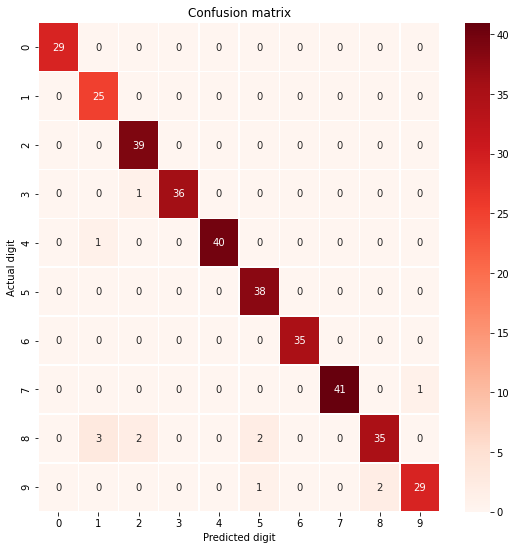

In [22]:
# The basic CM isn't very pretty, but we can jazz it up with some plotting.
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')

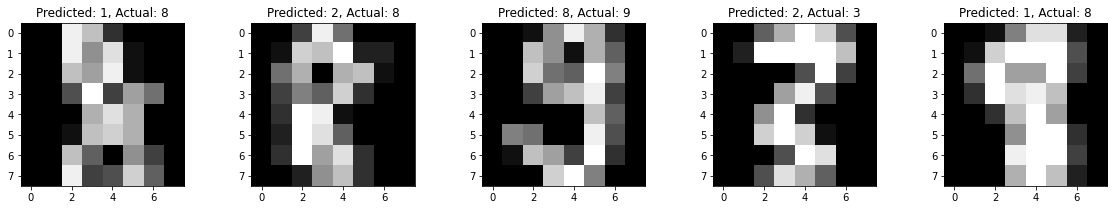

In [23]:
# Here, we can see examples of 5 of the data-points that the model gets wrong.  
# (This assumes there are at least 5; if not, might need to modify code a bit.)
wrong = np.nonzero(predictions != y_test)[0]

plt.figure(figsize=(20, 3))
for plotIdx, wrongIdx in enumerate(wrong[0:5]):
    plt.subplot(1, 5, plotIdx + 1)
    plt.imshow(np.reshape(x_test[wrongIdx], (8,8)), cmap=plt.cm.gray)
    plt.title(
        'Predicted: {}, Actual: {}'.format(predictions[wrongIdx],
             y_test[wrongIdx]))